In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import namedtuple
import glob
import SimpleITK as sitk

## Loading files:

### Candidates:
it contains the candidate:
- seriesid,
- coordinates of candidates (x,y,z),
- class: 0 for a candidate that is not and actual nodule, 1 for a candidate that is a nodule, either malignant or benign.

### Annotation:
it contains information about some of the candidates:
- seriesid,
- coordinates of candidates (x,y,z),
- diameter_mm: the diameter of each candidate.

In [34]:
df_can = pd.read_csv('./luna/candidates.csv')
df_ann = pd.read_csv('./luna/annotations.csv')
df_can.loc[0,'seriesuid']

'1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860'

In [28]:
print(f"# of candidates: {df_can.shape[0]}")
df_can.head()

# of candidates: 551065


,seriesuid,coordX,coordY,coordZ,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-56.08,-67.85,-311.92,0
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,53.21,-244.41,-245.17,0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.66,-121.80,-286.62,0
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-33.66,-72.75,-308.41,0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-32.25,-85.36,-362.51,0


In [13]:
df_ann.head()

,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150


In [29]:
print(df_can['class'].value_counts())
df_can['class'].value_counts(normalize=True)

0    549714
1      1351
Name: class, dtype: int64


0    0.997548
1    0.002452
Name: class, dtype: float64

<AxesSubplot:>

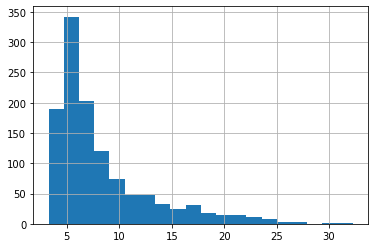

In [30]:
df_ann['diameter_mm'].hist(bins=20)

In [44]:
IrcTuple = namedtuple('IrcTuple', ['index', 'row', 'col'])
XyzTuple = namedtuple('XyzTuple', ['x', 'y', 'z'])

class CT():
    def __init__(self, filename):
        file_path = glob.glob(f'./luna/subset*/{filename}.mhd')[0]
        
        ct_mhd = sitk.ReadImage(file_path)
        ct_np = np.array(sitk.GetArrayFromImage(ct_mhd), dtype=np.float32)
        
        self.series_id = file_path
        self.hu = np.clip(ct_np, -1000, 1000)
        
        self.origin_xyz = XyzTuple(*ct_mhd.GetSpacing())
        self.vxsize_xyz = XyzTuple(*ct_mhd.GetSpacing())
        self.direction = np.array(ct_mhd.GetDirection()).reshape(3,3)
        print(self.origin_xyz, self.vxsize_xyz, self.direction)
        
    def plot_irc(self, i, r, c):
        d1, d2, d3 = (self.hu).shape
        
        if i>=d1 or r>=d2 or c>=d3:
            raise ValueError('The indices is out of range')
        
        fig, ax = plt.subplots(1, 3, figsize=(15,15))
        ax[0].imshow(self.hu[i], origin='lower')
        ax[0].set_title(f'index = {i}')
        
        ax[1].imshow(self.hu[:,r,:], origin='lower')
        ax[1].set_title(f'row = {r}')
        
        ax[2].imshow(self.hu[:,:,c], origin='lower')
        ax[2].set_title(f'column = {c}')
        
        print(f"image size is: {(self.hu).shape}")
    

XyzTuple(x=0.607421875, y=0.607421875, z=0.5) XyzTuple(x=0.607421875, y=0.607421875, z=0.5) [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
image size is: (672, 512, 512)


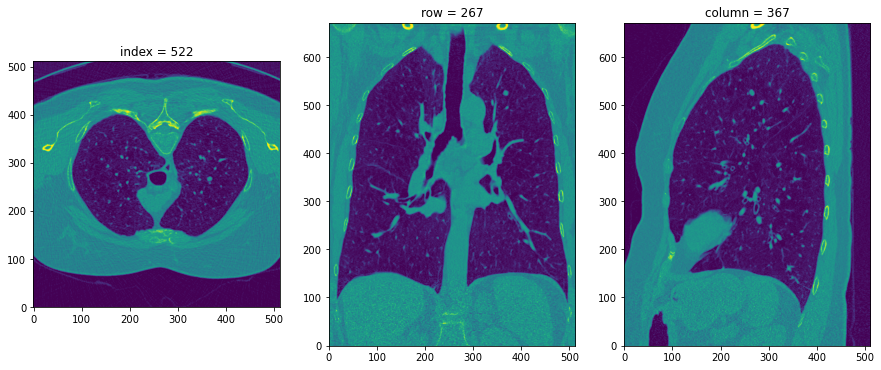

In [45]:
filename = '1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354'
ct = CT(filename)
ct.plot_irc(522, 267, 367)